# Problem Statement : Loan Approval Prediction 

# Validates the customer eligibility for loan or not

## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pickle
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("final-loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Data Analysis

In [3]:
df.shape

(128835, 13)

In [4]:
# Check unique values of target varaible
df['Loan_Status'].value_counts()

Y    88550
N    40285
Name: Loan_Status, dtype: int64

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

We have 8 categorical features : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
Loan_ID              128835 non-null object
Gender               126108 non-null object
Married              128205 non-null object
Dependents           125688 non-null object
Education            128835 non-null object
Self_Employed        122120 non-null object
ApplicantIncome      128835 non-null int64
CoapplicantIncome    128835 non-null float64
LoanAmount           124219 non-null float64
Loan_Amount_Term     125895 non-null float64
Credit_History       118342 non-null float64
Property_Area        128835 non-null object
Loan_Status          128835 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


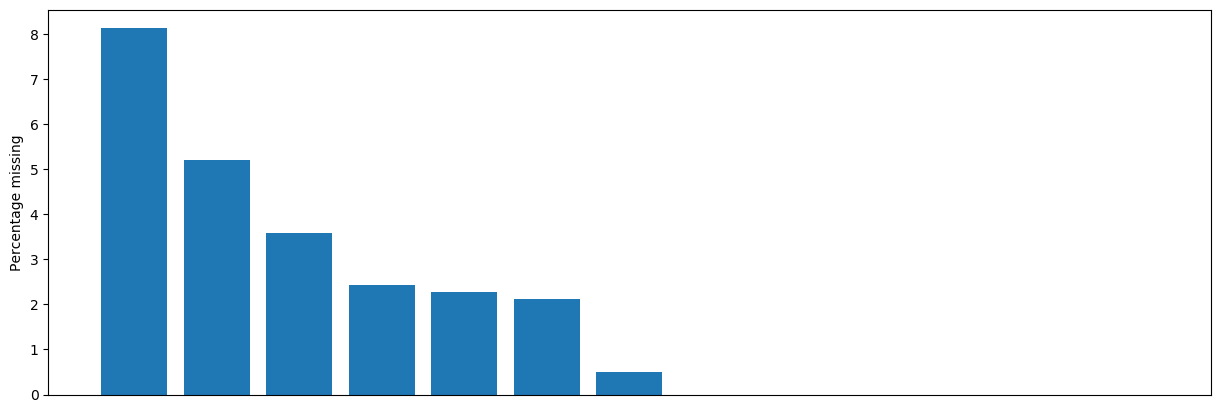

In [8]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [9]:
## Dropping columns which has more than 5% of missing values
dropcols = missing[missing[0]>5]
dropcols

,0
Credit_History,8.144526
Self_Employed,5.212093


### Check the total percentage of missing values of full dataset after dropping columns with more than 70% of missing values

In [10]:
missing_values_count= df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 1.8669078815778082%


In [11]:
df["Loan_Status"].value_counts()

Y    88550
N    40285
Name: Loan_Status, dtype: int64

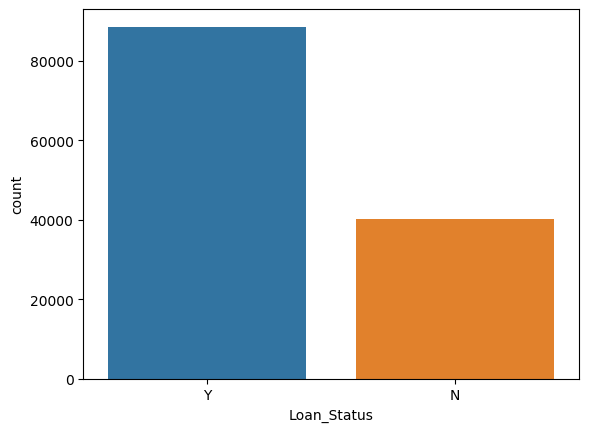

In [12]:
sns.countplot(df["Loan_Status"])

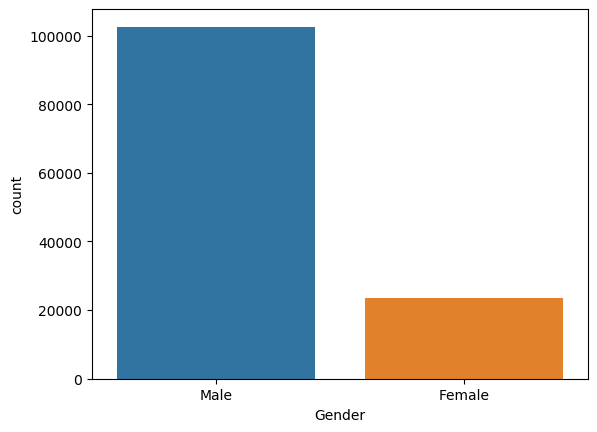

In [13]:
sns.countplot(df["Gender"])

In [14]:
df.isnull().sum()

Loan_ID                  0
Gender                2727
Married                630
Dependents            3147
Education                0
Self_Employed         6715
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount            4616
Loan_Amount_Term      2940
Credit_History       10493
Property_Area            0
Loan_Status              0
dtype: int64

In [15]:
(df.isnull().sum()/len(df))*(100)

Loan_ID              0.000000
Gender               2.116661
Married              0.488998
Dependents           2.442659
Education            0.000000
Self_Employed        5.212093
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.582877
Loan_Amount_Term     2.281989
Credit_History       8.144526
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [16]:
df["Loan_Amount_Term"].value_counts()

360.0    107430
180.0      9231
480.0      3148
300.0      2730
240.0       839
84.0        838
120.0       630
60.0        420
36.0        419
12.0        210
Name: Loan_Amount_Term, dtype: int64

In [17]:
df["Credit_History"].value_counts()

1.0    99669
0.0    18673
Name: Credit_History, dtype: int64

# Featured Engineering

## Handle Missing values

In [18]:
#Handle missing value for categorical features
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)

In [19]:
#Handle missing value for Numerical features
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(),inplace=True)

## Convert categorical data into the Numeric data

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128835 entries, 0 to 128834
Data columns (total 13 columns):
Loan_ID              128835 non-null object
Gender               128835 non-null object
Married              128835 non-null object
Dependents           128835 non-null object
Education            128835 non-null object
Self_Employed        128835 non-null object
ApplicantIncome      128835 non-null int64
CoapplicantIncome    128835 non-null float64
LoanAmount           128835 non-null float64
Loan_Amount_Term     128835 non-null float64
Credit_History       128835 non-null float64
Property_Area        128835 non-null object
Loan_Status          128835 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [21]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Married"] = df["Married"].map({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
df["Education"] = df["Education"].map({"Graduate":1,"Not Graduate":0})
df["Self_Employed"] = df["Self_Employed"].map({"No":0,"Yes":1})
df["Property_Area"] = df["Property_Area"].map({"Urban":0,"Semiurban":1,"Rural":3})

In [22]:
df["Loan_Status"] = df["Loan_Status"].map({"Y":1,"N":0})

In [23]:
df = df.drop("Loan_ID", axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


## Split dataset into the training and testing

In [24]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state = 10, stratify = y)

In [26]:
len(x_train),len(y_train)

(90184, 90184)

In [27]:
len(x_test),len(y_test)

(38651, 38651)

## Model Training

In [28]:
class Evaluation():
    
    def __init__(self,model):
        self.model = model
    
    def train(self,x_train,y_train):
        y_train_pred = self.model.predict(x_train)
        accuracy_score_train= accuracy_score(y_train,y_train_pred)
        print("Accuracy Score : ",accuracy_score_train)
        print()

        confusion_matrix_train = confusion_matrix(y_train,y_train_pred)
        print("Confusion Matrix :\n ",confusion_matrix_train)
        print()

        classification_report_train = classification_report(y_train,y_train_pred)
        print("Classification Report :\n ",classification_report_train)
        
    def test(self,x_test,y_test):
        y_test_pred = self.model.predict(x_test)
        accuracy_score_test = accuracy_score(y_test,y_test_pred)
        print("Accuracy Score : ",accuracy_score_test)
        print()

        confusion_matrix_test= confusion_matrix(y_test,y_test_pred)
        print("Confusion Matrix :\n ",confusion_matrix_test)
        print()

        classification_report_test = classification_report(y_test,y_test_pred)
        print("Classification Report :\n ",classification_report_test)
        

### RandomForest Model Training

In [29]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### RandomForest Model Evaluation

In [30]:
rf_evaluation = Evaluation(rf_model)

In [31]:
#Accuracy test on Training dataset
rf_evaluation.train(x_train,y_train)

Accuracy Score :  1.0

Confusion Matrix :
  [[28199     0]
 [    0 61985]]

Classification Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     28199
           1       1.00      1.00      1.00     61985

    accuracy                           1.00     90184
   macro avg       1.00      1.00      1.00     90184
weighted avg       1.00      1.00      1.00     90184



In [32]:
#Accuracy test on Testing dataset
rf_evaluation.test(x_test,y_test)

Accuracy Score :  1.0

Confusion Matrix :
  [[12086     0]
 [    0 26565]]

Classification Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     12086
           1       1.00      1.00      1.00     26565

    accuracy                           1.00     38651
   macro avg       1.00      1.00      1.00     38651
weighted avg       1.00      1.00      1.00     38651



### Logistic Regression Model Training

In [33]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Logistic Regression Model Evaluation

In [34]:
lr_evaluation = Evaluation(lr_model)

In [35]:
#Accuracy test on Training dataset
lr_evaluation.train(x_train,y_train)

Accuracy Score :  0.814190987314823

Confusion Matrix :
  [[12480 15719]
 [ 1038 60947]]

Classification Report :
                precision    recall  f1-score   support

           0       0.92      0.44      0.60     28199
           1       0.79      0.98      0.88     61985

    accuracy                           0.81     90184
   macro avg       0.86      0.71      0.74     90184
weighted avg       0.84      0.81      0.79     90184



In [36]:
#Accuracy test on Testing dataset
lr_evaluation.train(x_test,y_test)

Accuracy Score :  0.8091899304028356

Confusion Matrix :
  [[ 5142  6944]
 [  431 26134]]

Classification Report :
                precision    recall  f1-score   support

           0       0.92      0.43      0.58     12086
           1       0.79      0.98      0.88     26565

    accuracy                           0.81     38651
   macro avg       0.86      0.70      0.73     38651
weighted avg       0.83      0.81      0.78     38651



## Create Model Pickel File

In [37]:
pickle.dump(rf_model,open('loan_pred_model.pkl','wb'))

In [38]:
model = pickle.load(open('loan_pred_model.pkl',"rb"))

In [39]:
model.predict(x.loc[100:100,:])

array([1], dtype=int64)

## API

In [40]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})
df["Married"] = df["Married"].map({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
df["Education"] = df["Education"].map({"Graduate":1,"Not Graduate":0})
df["Self_Employed"] = df["Self_Employed"].map({"No":0,"Yes":1})
df["Property_Area"] = df["Property_Area"].map({"Urban":0,"Semiurban":1,"Rural":3})

In [41]:
def get_gender_encode(Gender):
    if Gender == 'Male':
        Gender = 1
    elif Gender == 'Female':
        Gender = 0
    else:
        Gender = "Please enter correct value"
        
    return Gender

In [42]:
def get_married_encode(Married):
    if Married == 'Yes':
        Married = 1
    elif Married == 'No':
        Married = 0
    else:
        Married = "Please enter correct value"
        
    return Married

In [43]:
def get_dependents_encode(Dependents):
    if Dependents == '0':
        Dependents = 0
    elif Dependents == '1':
        Dependents = 1
    elif Dependents == '2':
        Dependents = 2
    elif Dependents == '3+' or Dependents == '3':
        Dependents = 3
    else:
        Dependents = "Please enter correct value"
        
    return Dependents

In [44]:
def get_education_encode(Education):
    if Education == 'Graduate':
        Education = 1
    elif Education == 'Not Graduate':
        Education = 0
    else:
        Education = "Please enter correct value"
        
    return Education

In [45]:
def get_self_emp_encode(Self_Employed):
    if Self_Employed == 'Yes':
        Self_Employed = 1
    elif Self_Employed == 'No':
        Self_Employed = 0
    else:
        Self_Employed = "Please enter correct value"
        
    return Self_Employed

In [46]:
def get_property_area_encode(Property_Area):
    if Property_Area == 'Urban':
        Property_Area = 0
    elif Property_Area == 'Semiurban':
        Property_Area = 1
    elif Property_Area == 'Rural':
        Property_Area = 2
    else:
        Property_Area = "Please enter correct value"
        
    return Property_Area

In [47]:
x.to_csv('test.csv')


In [48]:
#*****************************

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [50]:
model = RandomForestClassifier()

In [51]:
params={"Random Forest":{
#                     'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                 
                    'max_features':['sqrt','log2',None],
                    'n_estimators': [8,16,32,64,128,256]}}

In [52]:
params

{'Random Forest': {'max_features': ['sqrt', 'log2', None],
  'n_estimators': [8, 16, 32, 64, 128, 256]}}

In [53]:
para = params['Random Forest']
para

{'max_features': ['sqrt', 'log2', None],
 'n_estimators': [8, 16, 32, 64, 128, 256]}

In [54]:
gs = GridSearchCV(model,para,cv=3)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [55]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
gs.best_params_

{'max_features': 'sqrt', 'n_estimators': 8}

In [61]:
gs.best_score_

1.0

In [56]:
model.set_params(**gs.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_test_pred = model.predict(x_test)

In [59]:
test_model_score = r2_score(y_test, y_test_pred)
test_model_score

1.0